# **TIỀN XỬ LÝ** 
(Ngày cập nhật cuối: 14/1/2021)

## Các bước thực hiện:
 - Kiểm tra và tiền xử lý output 
 - Tách dữ liệu thành 3 tập: train, validaton, test.
 - Tiến hành tiền xử lý
 - Mô hình hoá


In [1]:
# IMPORT THƯ VIỆN
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

## Khám phá dữ liệu (đủ để có thể xác định câu hỏi)

In [2]:
pd.set_option('display.max_columns', None)  # Xem tất cả các cột

data = pd.read_csv('HOUSEs_info.csv', sep = '\t')
data.head()

,Loại hình,Quận/Huyện,Phòng ngủ,Phòng tắm,Diện tích,Diện tích sử dụng,Tình hình nội thất,Loại chủ quyền,Dự án,Tháp,Trạng thái,Giá bán,Ban công,Phòng cho giúp việc,Sân vườn,Phòng giải trí,Chỗ đậu xe hơi,Hồ bơi riêng,Quầy minibar,Tầng hầm,Số tầng,Góc làm việc,Thời gian Xây dựng,Nhà kho,Nuôi thú cưng,Mục đích sử dụng,Thời gian bắt đầu bán,Mã nhà đất,Giá đăng,Loại hình nhà đất,Số phòng ngủ,Số phòng tắm,Gym,Bàn ghế phòng khách,Chiều dài,Chiều rộng,Diện tích sàn,TV,Máy hút mùi,Kệ TV,Cảm biến cháy,Tủ lạnh
0,Căn hộ,Thủ Đức,2.0,2.0,79.36 m²,79.36 m²,Nội thất cơ bản,Sổ hồng,Dự án Opal Boulevard,B1,Chưa bàn giao,2.89 tỷ,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Căn hộ,Quận 4,2.0,2.0,96 m²,96 m²,Nội thất cơ bản,HĐ mua bán,The Pegasuite 1,NaN,NaN,3.85 tỷ,No,No,No,No,No,No,No,No,6.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Căn hộ,Quận 7,2.0,2.0,67.37 m²,NaN,Nội thất cơ bản,HĐ mua bán,Q7 Saigon Riverside,URANUS,Chưa bàn giao,2.35 tỷ,No,No,No,No,No,No,No,No,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Căn hộ,Quận 2,1.0,1.0,50.6 m²,50.6 m²,Nội thất cơ bản,HĐ mua bán,Vinhomes Golden River,The Aqua 1,NaN,5 tỷ,No,No,No,No,No,No,No,No,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Căn hộ,Quận 7,2.0,1.0,57 m²,57 m²,Không có nội thất,Sổ hồng,Riverside 90,NaN,NaN,2.95 tỷ,No,No,No,No,No,No,No,No,NaN,No,01/01/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
data.shape

(7617, 42)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một ngôi nhà, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [4]:
data.index.duplicated().sum()

0

## Đưa ra câu hỏi cần trả lời
**Output - Giá bán**
- Được tính từ **input - các thông tin của từng ngôi nhà** theo công thức nào?

 Trong đồ án này, ý nghĩa thực tế của việc đi tìm câu trả lời cho câu hỏi trên giúp người dùng có được 1 sự tham khảo với 1 độ chính xác cụ thể về giá nhà dựa trên các thông tin. Qua đó, người dùng có thể dựa trên dự đoán để tự đưa ra quyết định về việc mua (bán) nhà với một mức giá hợp lý.  


## Khám phá dữ liệu 
### 1. OUTPUT TRƯỚC KHI TIỀN XỬ LÝ

In [5]:
# Cột output hiện có kiểu dữ liệu gì?
data['Giá bán'].dtype

dtype('O')

In [6]:
# Cột output có giá trị thiếu không?
data['Giá bán'].isna().sum()

349

#### TIỀN XỬ LÝ OUTPUT

In [7]:
# Xoá ouput có giá trị thiếu
data = data[data['Giá bán'].notna()]
data['Giá bán'].isna().sum()
data = data.reset_index(drop = True) 

In [8]:
# Chuẩn hoá về dạng số

# Vị trí các số hảng tỷ
mil_index = [] 
# Vị trí các số hảng triệu
bil_index = []

for i in range(0, data.shape[0]):
    value = data['Giá bán'][i] 
    if 'tỷ' in value:
        data.at[i, 'Giá bán'] = value.rstrip(' tỷ')
        bil_index.append(i)
    elif 'tr' in value:
        data.at[i, 'Giá bán'] = value.rstrip(' tr')
        mil_index.append(i)

In [9]:
# Chuyển đơn vị triệu thành triệu (đồng)
data['Giá bán'] = data['Giá bán'].astype(float)
for i in bil_index:
    data.at[i, 'Giá bán'] = data['Giá bán'][i] * 100
data['Giá bán'] = data['Giá bán'].astype(int)

### 2. SAU KHI TIỀN XỬ LÝ OUTPUT

In [10]:
# Cột output hiện có kiểu dữ liệu gì?
data['Giá bán'].dtype

dtype('int32')

In [11]:
# Cột output có giá trị thiếu không?
data['Giá bán'].isna().sum()

0

## Tiền xử lý (tách các tập)
  - Ta tách các tập từ dữ liệu thu thập được thành 3 tập: train, validation và test theo tỉ lệ: 70%:15%:15%

In [12]:
# Tách X và y
y_sr = data['Giá bán'] # sr là viết tắt của series
X_df = data.drop("Giá bán", axis=1)

In [13]:
# Tách theo tỉ lệ: 7:1.5:1.5
# Tách dữ liệu thu thập thành 2 tập: tập huấn luyện và tập other (validation và test) theo tỉ lệ 70%:30%
train_X_df, other_X_df, train_y_sr, other_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

# Tách tập other (validation và test) thành 2 tập: tập validation và tập test theo tỉ lệ 50%:50% (tức: bằng 15%:15% so với dữ liệu ban đầu)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(other_X_df, other_y_sr, test_size=0.5, random_state=0)

train_X_df.shape, val_X_df.shape, test_X_df.shape, train_y_sr.shape, val_y_sr.shape, test_y_sr.shape


((5087, 41), (1090, 41), (1091, 41), (5087,), (1090,), (1091,))

## Khám phá dữ liệu (tập huấn luyện)

In [14]:
train_X_df.dtypes

Loại hình                 object
Quận/Huyện                object
Phòng ngủ                float64
Phòng tắm                float64
Diện tích                 object
Diện tích sử dụng         object
Tình hình nội thất        object
Loại chủ quyền            object
Dự án                     object
Tháp                      object
Trạng thái                object
Ban công                  object
Phòng cho giúp việc       object
Sân vườn                  object
Phòng giải trí            object
Chỗ đậu xe hơi            object
Hồ bơi riêng              object
Quầy minibar              object
Tầng hầm                  object
Số tầng                  float64
Góc làm việc              object
Thời gian Xây dựng        object
Nhà kho                   object
Nuôi thú cưng             object
Mục đích sử dụng          object
Thời gian bắt đầu bán     object
Mã nhà đất                object
Giá đăng                  object
Loại hình nhà đất         object
Số phòng ngủ              object
Số phòng t

In [15]:
train_X_df.dtypes[train_X_df.dtypes != object]

Phòng ngủ    float64
Phòng tắm    float64
Số tầng      float64
dtype: object

 Các thuộc tính kiểu số nguyên. Bao gồm:
 - Phòng ngủ
 - Phòng tắm
 - Số tầng

In [16]:
int_num_cols = ['Phòng ngủ', 'Phòng tắm', 'Số tầng']
float_num_cols = []

In [17]:
# Các cột dạng số
df = train_X_df[int_num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,Phòng ngủ,Phòng tắm,Số tầng
missing_ratio,1.8,2.2,48.7
min,0.0,1.0,1.0
lower_quartile,2.0,1.0,3.0
median,2.0,2.0,9.0
upper_quartile,2.0,2.0,17.0
max,31.0,32.0,44.0


In [18]:
# Các cột không phải dạng số

cat_cols = list(set(train_X_df.columns) - set(int_num_cols))
df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])


,Trạng thái,Bàn ghế phòng khách,Số phòng ngủ,Gym,Diện tích sàn,Thời gian bắt đầu bán,Nhà kho,Dự án,TV,Diện tích,Tủ lạnh,Chỗ đậu xe hơi,Tầng hầm,Sân vườn,Thời gian Xây dựng,Tình hình nội thất,Kệ TV,Mã nhà đất,Máy hút mùi,Quận/Huyện,Ban công,Phòng giải trí,Cảm biến cháy,Góc làm việc,Mục đích sử dụng,Chiều rộng,Loại hình,Quầy minibar,Loại hình nhà đất,Loại chủ quyền,Hồ bơi riêng,Diện tích sử dụng,Số phòng tắm,Giá đăng,Chiều dài,Tháp,Nuôi thú cưng,Phòng cho giúp việc
missing_ratio,77.6,99.2,100,95.9,99.3,86.3,57.7,18.6,99.6,0.7,99.9,0,7.9,0,94.8,4.8,99.9,100,99.8,0,0,0,99.9,28.2,94.9,98.9,0,0.5,100,27.9,0.1,19.2,100,100,98.9,52.3,84.4,0
num_values,1,2,0,2,34,386,2,349,1,1194,1,2,2,2,32,3,1,0,1,24,2,2,1,2,20,16,14,2,0,4,2,1071,0,0,21,230,2,2
value_ratios,{'Chưa bàn giao': 100.0},"{'No': 93.0, 'Yes': 7.0}",{},"{'No': 94.8, 'Yes': 5.2}","{'75.5 m²': 2.9, '473 m²': 2.9, '9.2 m²': 2.9,...","{'28/09/2020': 2.2, '07/12/2020': 1.6, '26/11/...","{'No': 97.7, 'Yes': 2.3}","{'Vinhomes Grand Park': 17.1, 'Q7 Saigon River...",{'No': 100.0},"{'59 m²': 3.6, '69 m²': 2.3, '66.66 m²': 1.6, ...",{'No': 100.0},"{'No': 89.7, 'Yes': 10.3}","{'No': 97.1, 'Yes': 2.9}","{'No': 97.9, 'Yes': 2.1}","{'01/01/2016': 19.8, '01/01/2015': 16.4, '01/0...","{'Nội thất cơ bản': 40.0, 'Đầy đủ nội thất': 3...",{'No': 100.0},{},{'No': 100.0},"{'Quận 9': 19.9, 'Quận 2': 15.4, 'Quận 7': 15....","{'No': 88.3, 'Yes': 11.7}","{'No': 97.1, 'Yes': 2.9}",{'No': 100.0},"{'No': 92.7, 'Yes': 7.3}","{'để ở hoặc cho thuê': 28.8, 'Để ở': 22.3, 'Ở'...","{'4 m': 21.8, '5 m': 20.0, '8 m': 10.9, '6 m':...","{'Căn hộ': 81.0, 'Nhà phố': 12.8, 'Office-tel'...","{'No': 99.2, 'Yes': 0.8}",{},"{'HĐ mua bán': 72.1, 'Sổ hồng': 25.9, 'Sổ đỏ':...","{'No': 92.0, 'Yes': 8.0}","{'54 m²': 3.7, '63 m²': 3.1, '65 m²': 2.1, '75...",{},{},"{'20 m': 18.2, '17 m': 12.7, '18 m': 10.9, '19...","{'Block B': 3.5, 'VENUS': 3.2, 'Tháp A': 3.2, ...","{'No': 94.8, 'Yes': 5.2}","{'No': 99.2, 'Yes': 0.8}"


Tiến hành `xoá` các cột có độ **missing values >=50%** và đối với các cột kiểu nhị phân (Yes/No) thì xoá các cột có **độ lệch > 95%**.

Nhằm:

    - Giúp dữ liệu cân bằng
    - Tránh dữ liệu nhiễu

In [41]:
# liệt kê các tập có độ missing values >= 50% và có độ lệch dữ liệu > 95% (đối với cate Yes, No)
dropped_cols = []
for i in range(0, df.shape[1]):
    if df.agg(missing_ratio)[i] >= 50:
#         print('Missing: ', df.columns.values[i], df.agg(missing_ratio)[i])
        dropped_cols.append(df.columns.values[i])
        
    elif 'Yes' in df.agg(value_ratios)[i] or 'No' in df.agg(value_ratios)[i]:
        if df.agg(value_ratios)[i]['Yes'] > 99.0 or df.agg(value_ratios)[i]['No'] > 95.0:
#             print('Values > 99: ', df.columns.values[i], df.agg(value_ratios)[i])
            dropped_cols.append(df.columns.values[i])

len(dropped_cols)

27

#### Dữ liệu được phân bố như thế nào?

array([[<AxesSubplot:title={'center':'Giá bán'}>,
        <AxesSubplot:title={'center':'Phòng ngủ'}>],
       [<AxesSubplot:title={'center':'Phòng tắm'}>,
        <AxesSubplot:title={'center':'Số tầng'}>]], dtype=object)

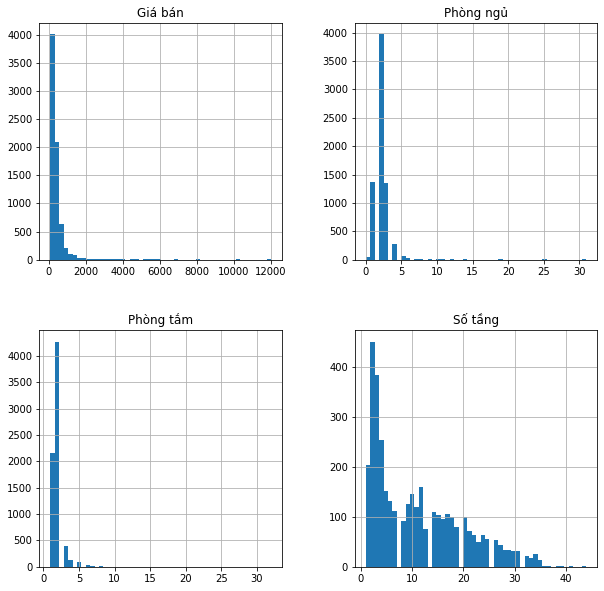

In [42]:
data.hist(bins=50, figsize=(10, 10))

## Tiền xử lý (tập huấn luyện)

    Ta tiến hành tiền xử lý như sau:
       * Xoá đi những cột có độ missing values > 50% và có độ lệch dữ liệu > 95%
       * Chuyển các cột dạng số nhưng lại ở dạng chuỗi về lại dạng số ('Diệc tích', 'Diện tích sử dụng')
       * Các cột có nhiều giá trị, tiến hành gom nhóm các giá trị nhỏ lại với nhau    

In [43]:
# Hàm chuyển các cột dạng số nhưng lại ở dạng chuỗi về lại dạng số
def ConVert2Num(df, array):
    '''
    Input : df, Categorical Column Name Array
    Output: Numeric Columns
    '''
    
    for j in array:
        for i in range(0, df.shape[0]):
            index = df.index[i]
            temp = df[j][index] 

            if pd.isna(temp) == False:
                if 'm²' in temp:
                    df.at[index, j] = temp.replace(',', '').rstrip(' m²')
                    
        df[j] = df[j].astype(float)
    
    return df

#Hàm chuyển cột số tầng từ float sang int
def Convert2Int(df, array):
    '''
    Input : df, Float Column Name Array
    Output: Int Columns
    '''
    
    for i in array:
        df[i] = df[i].fillna(value = -1)
        df[i] = df[i].astype(int)
        df[i] = df[i].replace(-1, np.nan)
    return df

Các cột gom nhóm như sau:
- Cột `Loại hình`, `Dự án`, `Quận/Huyện`
- Các cột chia thành 5 giá trị bao gồm 4 giá trị xuất hiện nhiều nhất và giá trị Others cho các giá trị còn lại

In [44]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_Loai_hinh=1, num_top_Du_an=1, num_top_Quan=1):
        self.num_top_Loai_hinh = num_top_Loai_hinh
        self.num_top_Du_an = num_top_Du_an
        self.num_top_Quan = num_top_Quan


    def fit(self, X_df, y=None):
        Loai_hinh_col = X_df['Loại hình']
        self.Loai_hinh_counts_ = Loai_hinh_col.value_counts()
        Loai_hinh = list(self.Loai_hinh_counts_.index)
        self.top_Loai_hinh_ = Loai_hinh[:max(1, min(self.num_top_Loai_hinh, len(Loai_hinh)))]
        
        Du_an_col = X_df['Dự án']
        self.Du_an_counts_ = Du_an_col.value_counts()
        Du_an = list(self.Du_an_counts_.index)
        self.top_Du_an_ = Du_an[:max(1, min(self.num_top_Du_an, len(Du_an)))]
        
        Quan_col = X_df['Quận/Huyện']
        self.Quan_counts_ = Quan_col.value_counts()
        Quan = list(self.Quan_counts_.index)
        self.top_Quan_ = Quan[:max(1, min(self.num_top_Quan, len(Quan)))]
        return self
    
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        df = X_df.copy()
        Loai_hinh_col = df["Loại hình"] 
        Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
        df["Thuộc loại hình"] = Loai_hinh_col
        
        Du_an_col = df["Dự án"] 
        Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
        df["Thuộc dự án"] = Du_an_col
        
        Quan_col = df["Quận/Huyện"] 
        Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
        df["Thuộc quận/huyện"] = Quan_col
        
        dropped_cols.extend(('Loại hình', 'Dự án', 'Quận/Huyện'))
        df.drop(dropped_cols, axis=1, inplace=True)
        
        # Điền thiếu cho cột 'Diện tích sử dụng' sao cho có giá trị < cột diện tích
        for i in range(0, df.shape[0]):
            index = df.index[i]
            temp = df['Diện tích sử dụng'][index] 

            if pd.isna(temp) == True:
                df.at[index, 'Diện tích sử dụng'] = df['Diện tích'][index]     
            
        to_float_arr = ['Diện tích', 'Diện tích sử dụng']
        ConVert2Num(df, to_float_arr)
        
        Convert2Int(df, int_num_cols)
        
        return df

In [45]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_Loai_hinh=4, num_top_Du_an=4, num_top_Quan=4)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.Loai_hinh_counts_)
print(col_adderdropper.top_Loai_hinh_)
print()
print(col_adderdropper.Du_an_counts_)
print(col_adderdropper.top_Du_an_)
print()
print(col_adderdropper.Quan_counts_)
print(col_adderdropper.top_Quan_)
print()


Căn hộ                 4120
Nhà phố                 652
Office-tel              162
Đất nền                  36
Shophouse                35
Biệt thự                 29
Penthouse                19
Văn phòng                19
Lofthouse                 4
Căn hộ dịch vụ            4
Loại khác                 3
Nhà xưởng kho bãi         2
Tòa nhà kinh doanh        1
Mặt bằng kinh doanh       1
Name: Loại hình, dtype: int64
['Căn hộ', 'Nhà phố', 'Office-tel', 'Đất nền']

Vinhomes Grand Park          707
Q7 Saigon Riverside          263
Vinhomes Central Park        248
The Sun Avenue               187
Saigon South Residence       136
                            ... 
Chung Cư TDH - Trường Thọ      1
Ngọc Lan Apartment             1
Chung cư An Khánh              1
Summer Square                  1
Happy One Thạnh Lộc            1
Name: Dự án, Length: 349, dtype: int64
['Vinhomes Grand Park', 'Q7 Saigon Riverside', 'Vinhomes Central Park', 'The Sun Avenue']

Quận 9        1014
Quận 2         781

## Sau khi tiền xử lý tập train

In [46]:
after_train_transform_df = col_adderdropper.transform(train_X_df)
print(after_train_transform_df.shape)
after_train_transform_df

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'


(5087, 14)


,Phòng ngủ,Phòng tắm,Diện tích,Diện tích sử dụng,Tình hình nội thất,Loại chủ quyền,Ban công,Chỗ đậu xe hơi,Hồ bơi riêng,Số tầng,Góc làm việc,Thuộc loại hình,Thuộc dự án,Thuộc quận/huyện
1452,2.0,2.0,50.0,50.0,Nội thất cơ bản,HĐ mua bán,No,No,No,17.0,No,Căn hộ,Others,Others
7096,1.0,1.0,48.5,48.5,Đầy đủ nội thất,NaN,No,No,No,NaN,No,Căn hộ,Others,Others
2450,1.0,1.0,21.4,42.8,Không có nội thất,Sổ hồng,Yes,Yes,No,2.0,Yes,Nhà phố,Others,Quận 2
4035,3.0,2.0,107.0,107.0,Đầy đủ nội thất,NaN,No,No,No,6.0,No,Căn hộ,Others,Others
2768,2.0,2.0,61.5,61.5,Đầy đủ nội thất,Sổ hồng,No,No,No,NaN,No,Căn hộ,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4.0,3.0,46.4,113.0,Không có nội thất,Sổ hồng,No,No,No,3.0,No,Nhà phố,Others,Others
3264,1.0,1.0,57.0,57.0,Nội thất cơ bản,NaN,No,No,No,8.0,No,Căn hộ,Others,Quận 9
1653,0.0,NaN,58.5,52.7,Không có nội thất,NaN,No,No,No,NaN,No,Others,Vinhomes Grand Park,Quận 9
2607,2.0,2.0,55.0,86.0,Đầy đủ nội thất,HĐ mua bán,No,No,No,4.0,NaN,Căn hộ,Others,Quận 7


In [47]:
after_train_transform_df.agg([missing_ratio, num_values, value_ratios])

,Phòng ngủ,Phòng tắm,Diện tích,Diện tích sử dụng,Tình hình nội thất,Loại chủ quyền,Ban công,Chỗ đậu xe hơi,Hồ bơi riêng,Số tầng,Góc làm việc,Thuộc loại hình,Thuộc dự án,Thuộc quận/huyện
missing_ratio,1.8,2.2,0.7,0,4.8,27.9,0,0,0.1,48.7,28.2,0,0,0
num_values,17,16,1194,1244,3,4,2,2,2,40,2,5,5,5
value_ratios,"{2.0: 56.1, 1.0: 18.9, 3.0: 18.6, 4.0: 3.8, 5....","{2.0: 60.2, 1.0: 30.2, 3.0: 5.5, 4.0: 2.0, 5.0...","{59.0: 3.6, 69.0: 2.3, 66.66: 1.6, 70.0: 1.6, ...","{54.0: 3.1, 63.0: 2.6, 65.0: 1.9, 75.0: 1.8, 4...","{'Nội thất cơ bản': 40.0, 'Đầy đủ nội thất': 3...","{'HĐ mua bán': 72.1, 'Sổ hồng': 25.9, 'Sổ đỏ':...","{'No': 88.3, 'Yes': 11.7}","{'No': 89.7, 'Yes': 10.3}","{'No': 92.0, 'Yes': 8.0}","{2.0: 12.2, 3.0: 10.5, 4.0: 6.6, 1.0: 5.3, 5.0...","{'No': 92.7, 'Yes': 7.3}","{'Căn hộ': 81.0, 'Nhà phố': 12.8, 'Office-tel'...","{'Others': 72.4, 'Vinhomes Grand Park': 13.9, ...","{'Others': 38.8, 'Quận 9': 19.9, 'Quận 2': 15...."


- Các cột dạng số nguyên (`int_numerical`) gồm: "Phòng ngủ", "Phòng tắm", "Số tầng".
- Các cột dạng số thực (`float_numerical`) gồm:"Diện tích", "Diện tích sử dụng".
- Các cột không phải dạng số (`categorical`): Các cột còn lại. 

**Các bước tiền xử lý tiếp theo như sau:**

   - Với các cột dạng số thực, ta sẽ điền giá trị thiếu bằng giá trị mean của cột. 
   - Với các cột dạng số nguyên, ta sẽ điền giá trị thiếu bằng giá trị median của cột. 
   - Với các cột không phải dạng số ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột. Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot.

In [48]:
# CÁC CỘT DẠNG SỐ kiểu float
float_num_cols.extend(('Diện tích', 'Diện tích sử dụng'))
float_num_cols

['Diện tích', 'Diện tích sử dụng']

In [49]:
# CỘT KHÔNG PHẢI DẠNG SỐ
cate_cols = []
for i in after_train_transform_df.columns:
    if i not in int_num_cols and i not in float_num_cols:
        cate_cols.append(i)
#         print(i)
        
# Số lượng cột
len(cate_cols)

9

## Mô hình hoá tập tập train

In [50]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder()
categorical_transformer = make_pipeline(imp_mode, encoding)

colTransform = ColumnTransformer(transformers=[('float_numerical', imp_mean, float_num_cols),
                                                ('int_numerical', imp_median, int_num_cols),
                                               ('categorical', categorical_transformer, cate_cols)])

colNormalize = StandardScaler()
preprocess_pipeline = make_pipeline(col_adderdropper, colTransform, colNormalize)

preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'


In [51]:
preprocess_pipeline

Pipeline(steps=[('coladderdropper',
                 ColAdderDropper(num_top_Du_an=4, num_top_Loai_hinh=4,
                                 num_top_Quan=4)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('float_numerical',
                                                  SimpleImputer(),
                                                  ['Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('int_numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Tình hình nội thất',
                                                   'Loại chủ quyền', 'Ban công',
                                                   'Chỗ đậu xe hơi',
                                                   'Hồ bơi riêng',
                                                   'Góc làm việc',
                                                   'Thuộc loại hình',
                                                   'Thuộc dự án',
                                                   'Thuộc quận/huyện'])])),
                ('standardscaler', StandardScaler())])

### Tiền xử lý (tập validation và tập test)
 - Một khi đã có preprocess_pipeline với các giá trị (top_Loai_hinh_, mean, median, mode, ...) đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức transform để tiền xử lý cho các véc-tơ input mới trong tập validation và tập test. 
 - Tiền xử lý cho val_X_df và test_X_df rồi lưu kết quả vào preprocessed_val_X và preprocessed_test_X.

## Tiền xử lý + Mô hình hoá


In [52]:
# Tạo full pipeline
coladderdropper = ColAdderDropper()
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder()
categorical_transformer = make_pipeline(imp_mode, encoding)

colTransform = ColumnTransformer(transformers=[('float_numerical', imp_mean, float_num_cols),
                                                ('int_numerical', imp_median, int_num_cols),
                                               ('categorical', categorical_transformer, cate_cols)])
colNormalize = StandardScaler()

mlpclassifier = MLPClassifier(hidden_layer_sizes=(20), activation='identity', solver='adam', random_state=0, max_iter=500)
full_pipeline = make_pipeline(coladderdropper, colTransform, colNormalize, mlpclassifier)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
num_top_Loai_hinh_s = [1, 3, 5, 7, 9]
best_val_err = float('inf'); best_alpha = None; best_num_top_Loai_hinh = None

for alpha in alphas:
    for num_top_Loai_hinh in num_top_Loai_hinh_s:
        full_pipeline.set_params(coladderdropper__num_top_Loai_hinh=num_top_Loai_hinh, mlpclassifier__alpha=alpha)
        full_pipeline.fit(train_X_df, train_y_sr)
        full_pipeline.predict(val_X_df)
        
        train_score = full_pipeline.score(train_X_df, train_y_sr)
        val_score = full_pipeline.score(val_X_df, val_y_sr)
        
        train_err, val_err = (1 - train_score) * 100, (1 - val_score) * 100
        
        train_errs.append(train_err)
        val_errs.append(val_err)
        
        if best_val_err > val_err:
            best_val_err = val_err
            best_alpha = alpha
            best_num_top_Loai_hinh = num_top_Loai_hinh
'Finish!'

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
C:\Users\phamd\anac

<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'


'Finish!'

In [53]:
# TEST
full_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_Loai_hinh=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('float_numerical',
                                                  SimpleImputer(),
                                                  ['Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('int_numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Tình hình nội thất',
                                                   'Loại chủ quyền', 'Ban công',
                                                   'Chỗ đậu xe hơi',
                                                   'Hồ bơi riêng',
                                                   'Góc làm việc',
                                                   'Thuộc loại hình',
                                                   'Thuộc dự án',
                                                   'Thuộc quận/huyện'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', alpha=1,
                               hidden_layer_sizes=20, max_iter=500,
                               random_state=0))])

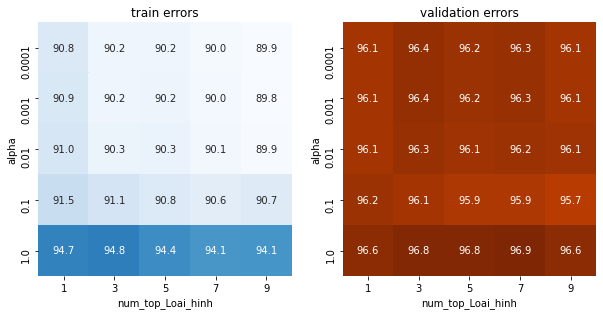

In [54]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_Loai_hinh_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=num_top_Loai_hinh_s)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Blues')
plt.title('train errors'); plt.xlabel('num_top_Loai_hinh'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Oranges')
plt.title('validation errors'); plt.xlabel('num_top_Loai_hinh'); plt.ylabel('alpha');

# Mô hình hoá trên tập test

In [55]:
full_pipeline.set_params(coladderdropper__num_top_Loai_hinh=best_num_top_Loai_hinh, mlpclassifier__alpha=best_alpha)
full_pipeline.fit(train_X_df, train_y_sr)
full_pipeline.fit(val_X_df, val_y_sr)
full_pipeline.fit(test_X_df, test_y_sr)

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'
<ipython-input-44-4

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_Loai_hinh=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('float_numerical',
                                                  SimpleImputer(),
                                                  ['Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('int_numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Tình hình nội thất',
                                                   'Loại chủ quyền', 'Ban công',
                                                   'Chỗ đậu xe hơi',
                                                   'Hồ bơi riêng',
                                                   'Góc làm việc',
                                                   'Thuộc loại hình',
                                                   'Thuộc dự án',
                                                   'Thuộc quận/huyện'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', alpha=0.1,
                               hidden_layer_sizes=20, max_iter=500,
                               random_state=0))])

### Ghi nhận kết quả 

In [56]:
y_test = full_pipeline.predict(test_X_df)
df = pd.DataFrame({test_X_df.index.name: test_X_df.index, 'Price': y_test})
df.to_csv('my_preds.csv',sep = '\t', index = False)

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'


In [62]:
result = pd.read_csv('my_preds.csv', sep = '\t', index_col = 'Unnamed: 0')
result.shape

(1091, 1)

In [61]:
test_y_sr

4446    750
3086    299
4181    509
3132    229
2580    235
       ... 
725     720
4668    245
5626    298
6081    250
5876    215
Name: Giá bán, Length: 1091, dtype: int32

## ĐÁNH GIÁ

- Kết quả của quá trình mô hình hoá sẽ được đánh giá dựa trên **`phần trăm sai số`** của giá trị thực tế và giá trị dự đoán trên tổng số các dự đoán

In [65]:
# Hàm tự đánh giá
sum_of_score = 0
for i in result.index:
    pre = result['Price'][i]
    real = test_y_sr[i]
    score = abs(real - pre) / real
    sum_of_score += score / (result.shape[0])
    
sum_of_score *= 100  
sum_of_score

24.930304300154692

In [68]:
# Hàm đánh giá theo pipeline
(1 - full_pipeline.score(test_X_df, test_y_sr))*100

<ipython-input-44-484dcd9272b5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-44-484dcd9272b5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Du_an_col[~Du_an_col.isin(self.top_Du_an_)] = 'Others'
<ipython-input-44-484dcd9272b5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quan_col[~Quan_col.isin(self.top_Quan_)] = 'Others'


77.72685609532539